# Logistic Regression 

## import library

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load training data

In [50]:
fname_data = 'C:/Users/heji0/OneDrive/문서/2021-1/머신러닝/08/assignment_08_data.csv'

data = np.genfromtxt(fname_data, delimiter=',')
num_data = data.shape[0]

point_x = np.zeros(num_data)
point_y = np.zeros(num_data)
label   = np.zeros(num_data)

for i in range(num_data):

    point_x[i]  = data[i,0]
    point_y[i]  = data[i,1]
    label[i]    = data[i,2]


## define linear regression function with inputs $\theta = (\theta_0, \theta_1, \theta_2)$ and ${\rm point} = (1, x, y)$

In [51]:
def linear_regression(theta, x, y):
    value = np.matmul(np.transpose(theta), np.array([1, x, y])) 
    return value

## define sigmoid function with input $x$

In [52]:
def sigmoid(x):
    z = 1 / (1 + np.exp(-x))
    return z

## define loss function for the logistic regression

In [53]:
def compute_loss(theta, x, y, label):
    f = linear_regression(theta, x, y)
    h = sigmoid(f)
    loss = (-label * np.log(h) - (1 - label) * np.log(1 - h)).mean()
    return loss

## define gradient vector for the model parameters $\theta = (\theta_0, \theta_1, \theta_2)$

In [54]:
def compute_gradient(theta, x, y, label):
    f = linear_regression(theta, x, y)
    h = sigmoid(f)
    num_data = x.shape[0]
    one = np.ones(num_data)
    X = np.column_stack([one,x,y])
    dev = np.dot(X.T,(h - label))
    gradient = dev / num_data
    return gradient

## gradient descent for the model parameters $\theta = (\theta_0, \theta_1, \theta_2)$

In [55]:
num_iteration   = 5000  # USE THIS VALUE for the number of gradient descent iterations 
learning_rate   = 0.001 # USE THIS VALUE for the learning rate
theta           = np.array((0, 0, 0))   # USE THIS VALUE for the initial condition of the model parameters
theta_iteration = np.zeros((num_iteration, theta.size))
loss_iteration = np.zeros(num_iteration)

## iterations for the gradient descent

In [56]:
for i in range(num_iteration):
    theta = theta - learning_rate * compute_gradient(theta, point_x, point_y, label)
    loss = compute_loss(theta, point_x, point_y, label)
    theta_iteration[i] = theta
    loss_iteration[i] = loss

    print("iteration = %4d, loss = %5.5f" % (i, loss))

<ipython-input-51-ad0fbe5cf05a>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  value = np.matmul(np.transpose(theta), np.array([1, x, y]))
iteration =    0, loss = 0.66813
iteration =    1, loss = 0.64476
iteration =    2, loss = 0.62295
iteration =    3, loss = 0.60256
iteration =    4, loss = 0.58350
iteration =    5, loss = 0.56567
iteration =    6, loss = 0.54897
iteration =    7, loss = 0.53332
iteration =    8, loss = 0.51864
iteration =    9, loss = 0.50485
iteration =   10, loss = 0.49188
iteration =   11, loss = 0.47967
iteration =   12, loss = 0.46817
iteration =   13, loss = 0.45731
iteration =   14, loss = 0.44706
iteration =   15, loss = 0.43736
iteration =   16, loss = 0.42817
iteration =   17, loss = 0.41947
iteration =   18, loss = 0.41121
iteration 

## plot the results

In [57]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   
    plt.title('loss')
    plt.plot(loss_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [58]:
def plot_data(point_x, point_y, label):
    
    plt.figure(figsize=(8,8))
    plt.title('training data')
    
    rx = []
    ry = []
    bx = []
    by = []
    for i in range(0, num_data):
        if label[i] == 0:
            bx.append(point_x[i])
            by.append(point_y[i])
        else:
            rx.append(point_x[i])
            ry.append(point_y[i])
    plt.plot(bx, by, 'o', color='blue', label = 'Class = 0')
    plt.plot(rx, ry, 'o', color='red', label = 'Class = 1')    
    
    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [59]:
def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))
    plt.title('model parameter')
    theta_iterationT = theta_iteration.T
    plt.plot(theta_iterationT[0], '-', color='red', label = 'theta0')
    plt.plot(theta_iterationT[1], '-', color='green', label = 'theta1')
    plt.plot(theta_iterationT[2], '-', color='blue', label = 'theta2')
    
    plt.xlabel('iteration')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [60]:
def plot_classifier(point_x, point_y, label):

    plt.figure(figsize=(8,8))
    plt.title('training data')
    
    rx = []
    ry = []
    bx = []
    by = []
    for i in range(0, num_data):
        if label[i] == 0:
            bx.append(point_x[i])
            by.append(point_y[i])
        else:
            rx.append(point_x[i])
            ry.append(point_y[i])
    plt.plot(bx, by, 'o', color='blue', label = 'Class = 0')
    plt.plot(rx, ry, 'o', color='red', label = 'Class = 1')      
    
    X, Y = np.meshgrid(point_x, point_y)
    Z = linear_regression(theta, X, Y)
    
    plt.contourf(X, Y, Z,levels = 100, cmap='bwr')
    plt.colorbar()
    plt.contour(X, Y, Z, levels= [0], colors = 'black')
        
    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data point in blue for class 0 and in red for class 1

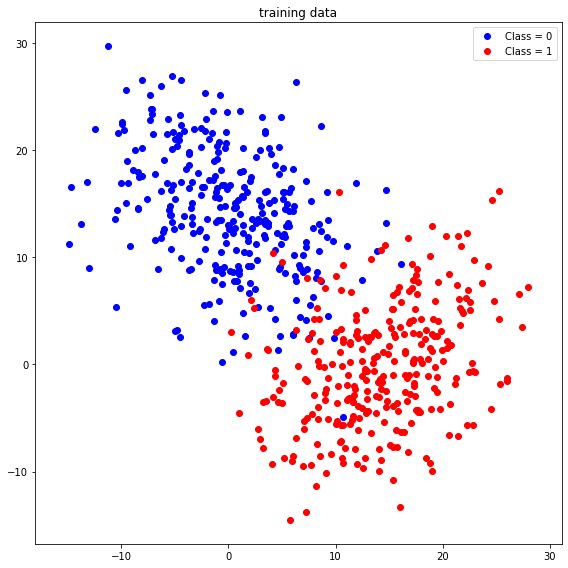

In [61]:
plot_data(point_x, point_y, label)

### # 02. plot the values of the model parameters $\theta_0$ in red curve, $\theta_1$ in green curve, and $\theta_2$ in blue curve over the gradient descent iterations

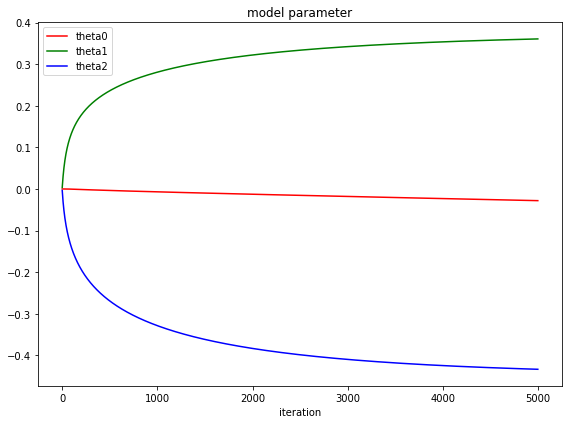

In [62]:
plot_model_parameter(theta_iteration)

### # 03. plot the loss values $\mathcal{L}(\theta)$ in red curve over the gradient descent iterations

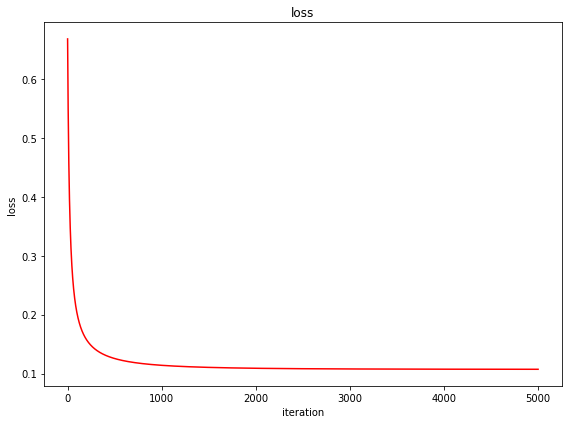

In [63]:
plot_loss_curve(loss_iteration)

### # 04. plot the classifier with the given data points superimposed

In [ ]:
plot_classifier(your_argument_list)